In [295]:
import pandas as pd 
#!pip install --upgrade scipy networkx --quiet
data = pd.read_csv('/content/best.colleague.csv')
data.dtypes #variables in data and their datatypes

layerID         int64
from            int64
to              int64
gender.from    object
dtype: object

In [296]:
data

,layerID,from,to,gender.from
0,2,1,8,male
1,2,1,11,male
2,2,1,12,male
3,2,2,5,male
4,2,2,6,male
...,...,...,...,...
176,2,29,13,female
177,2,29,23,female
178,2,29,24,female
179,2,29,27,female


In [297]:
df = data[['from', 'gender.from']]
df.drop_duplicates(inplace=True)
df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,from,gender.from
0,1,male
3,2,male
11,3,male
15,4,male
17,5,male
27,6,male
36,7,male
37,8,male
59,9,male
64,10,male


In [298]:
males = list(df[df['gender.from'] == 'male']['from'])
females = list(df[df['gender.from'] == 'female']['from'])

In [299]:
print(males)
print(females)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [300]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, source='from', target='to', edge_attr=True)
FGM = nx.from_pandas_edgelist(data[data['gender.from'] == 'male'], source='from', target='to', edge_attr=True)
FGF = nx.from_pandas_edgelist(data[data['gender.from'] == 'female'], source='from', target='to', edge_attr=True)

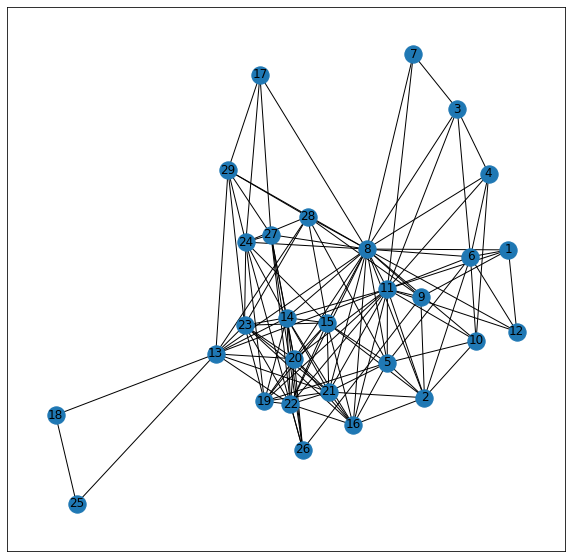

In [301]:
plt.figure(figsize=(10, 10))
nx.draw_networkx(FG, node_size=300)
plt.show()

In [302]:
#plt.figure(figsize=(10, 10))
#nx.draw_networkx(FGF, node_color='tab:pink', node_size=300)
#nx.draw_networkx(FGM, node_color='tab:blue', node_size=300)
#plt.show()

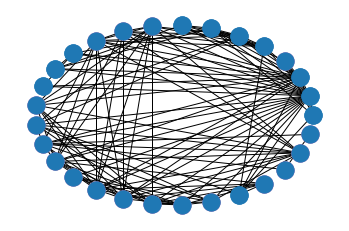

In [303]:
# network diagram
import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# nx.draw_networkx(FG)
# plt.show()

circ_pos = nx.circular_layout(FG) 
#Use the networkx draw function to easily visualise the graph

nx.draw_networkx_nodes(FG, circ_pos, nodelist=females, node_color='tab:pink', alpha=1)
nx.draw_networkx_nodes(FG, circ_pos, nodelist=males, node_color='tab:blue', alpha=1)
nx.draw(FG, circ_pos)

In [304]:
nx.center(FG)

[8, 11, 21, 28, 13, 14, 20, 22, 29]

In [305]:
# finding the shortest distance between two nodes
nx.shortest_path_length(FG, nx.center(FG)[0])

{8: 0,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 20: 1,
 21: 1,
 22: 1,
 24: 1,
 27: 1,
 28: 1,
 29: 1,
 18: 2,
 19: 2,
 23: 2,
 25: 2,
 26: 2}

In [306]:
for i in nx.center(FG):
    nx.shortest_path_length(FG, i)

In [307]:
#nx.diameter(FG)
print("Center: ", nx.center(FG))

print("Diameter: ", nx.diameter(FG))

print("Eccentricity: ", nx.eccentricity(FG))

print("Periphery: ", nx.periphery(FG))

Center:  [8, 11, 21, 28, 13, 14, 20, 22, 29]
Diameter:  3
Eccentricity:  {1: 3, 8: 2, 11: 2, 12: 3, 2: 3, 5: 3, 6: 3, 10: 3, 15: 3, 16: 3, 21: 2, 3: 3, 4: 3, 7: 3, 19: 3, 28: 2, 13: 2, 14: 2, 17: 3, 20: 2, 22: 2, 24: 3, 27: 3, 29: 2, 9: 3, 26: 3, 18: 3, 23: 3, 25: 3}
Periphery:  [1, 12, 2, 5, 6, 10, 15, 16, 3, 4, 7, 19, 17, 24, 27, 9, 26, 18, 23, 25]


In [308]:
density = nx.density(FG)

print('The edge density is: ' + str(density))

The edge density is: 0.3103448275862069


In [309]:
# find the number of edges.
dc=nx.degree_centrality(FG)
for i in dc:
    print("Node[",i,"]",dc[i])


Node[ 1 ] 0.17857142857142855
Node[ 8 ] 0.8214285714285714
Node[ 11 ] 0.6428571428571428
Node[ 12 ] 0.14285714285714285
Node[ 2 ] 0.3214285714285714
Node[ 5 ] 0.3571428571428571
Node[ 6 ] 0.3214285714285714
Node[ 10 ] 0.21428571428571427
Node[ 15 ] 0.42857142857142855
Node[ 16 ] 0.3571428571428571
Node[ 21 ] 0.42857142857142855
Node[ 3 ] 0.17857142857142855
Node[ 4 ] 0.17857142857142855
Node[ 7 ] 0.10714285714285714
Node[ 19 ] 0.3214285714285714
Node[ 28 ] 0.2857142857142857
Node[ 13 ] 0.39285714285714285
Node[ 14 ] 0.46428571428571425
Node[ 17 ] 0.14285714285714285
Node[ 20 ] 0.42857142857142855
Node[ 22 ] 0.42857142857142855
Node[ 24 ] 0.3571428571428571
Node[ 27 ] 0.2857142857142857
Node[ 29 ] 0.25
Node[ 9 ] 0.21428571428571427
Node[ 26 ] 0.21428571428571427
Node[ 18 ] 0.07142857142857142
Node[ 23 ] 0.39285714285714285
Node[ 25 ] 0.07142857142857142


In [310]:
# closeness Centrality
CC=nx.closeness_centrality(FG)

for i in CC:
    print("Node[",i,"]",CC[i])


Node[ 1 ] 0.5185185185185185
Node[ 8 ] 0.8484848484848485
Node[ 11 ] 0.7368421052631579
Node[ 12 ] 0.5
Node[ 2 ] 0.5714285714285714
Node[ 5 ] 0.5714285714285714
Node[ 6 ] 0.5490196078431373
Node[ 10 ] 0.5185185185185185
Node[ 15 ] 0.6086956521739131
Node[ 16 ] 0.5833333333333334
Node[ 21 ] 0.6363636363636364
Node[ 3 ] 0.509090909090909
Node[ 4 ] 0.509090909090909
Node[ 7 ] 0.49122807017543857
Node[ 19 ] 0.5714285714285714
Node[ 28 ] 0.5833333333333334
Node[ 13 ] 0.6222222222222222
Node[ 14 ] 0.6511627906976745
Node[ 17 ] 0.5185185185185185
Node[ 20 ] 0.6363636363636364
Node[ 22 ] 0.6363636363636364
Node[ 24 ] 0.5833333333333334
Node[ 27 ] 0.56
Node[ 29 ] 0.5714285714285714
Node[ 9 ] 0.5384615384615384
Node[ 26 ] 0.4745762711864407
Node[ 18 ] 0.39436619718309857
Node[ 23 ] 0.5384615384615384
Node[ 25 ] 0.39436619718309857


In [311]:
bc=nx.betweenness_centrality(FG,normalized=True, endpoints=False)
print(bc)

{1: 0.0020041686708353375, 8: 0.3003763570523607, 11: 0.14933846565187991, 12: 0.0, 2: 0.010747065006324262, 5: 0.015549676660787775, 6: 0.012345679012345677, 10: 0.0013227513227513227, 15: 0.016000120212694133, 16: 0.007936804351370178, 21: 0.017479510322647576, 3: 0.001763668430335097, 4: 0.0006613756613756613, 7: 0.0, 19: 0.0069365441649910965, 28: 0.018718829095424175, 13: 0.14726954979522672, 14: 0.0279304673609062, 17: 0.0, 20: 0.02351499746924583, 22: 0.02351499746924583, 24: 0.02321644445282789, 27: 0.010814557772229729, 29: 0.012004011481135661, 9: 0.015473963622111769, 26: 0.005605946082136557, 18: 0.0, 23: 0.017198916603678505, 25: 0.0}


In [312]:
bc1=nx.betweenness_centrality(FG,normalized=True, endpoints=False,k=4)
print(bc1)

{1: 0.004068462401795735, 8: 0.3117465420511639, 11: 0.20159689086072136, 12: 0.0, 2: 0.0, 5: 0.0011987433862433862, 6: 0.03116732804232804, 10: 0.0, 15: 0.003285967164643635, 16: 0.0032154528478057893, 21: 0.014346641434351519, 3: 0.0, 4: 0.0023974867724867724, 7: 0.0, 19: 0.0011282290694055398, 28: 0.010969341440279817, 13: 0.31009375972611264, 14: 0.021045074174450923, 17: 0.0, 20: 0.019127084756461504, 22: 0.019127084756461504, 24: 0.0067150997604428974, 27: 0.003429132595799262, 29: 0.01071817615935263, 9: 0.006131754048420715, 26: 0.0, 18: 0.0, 23: 0.006256298815822624, 25: 0.0}


In [313]:
# Local Clustering Coefficient 
print(nx.clustering(FG,nx.center(FG)))
for i in FG:
    print (nx.clustering(FG,i))

# Global Clustering

print("Global clustering using Average clustering: ", nx.average_clustering(FG))

{8: 0.2964426877470356, 11: 0.35947712418300654, 21: 0.7121212121212122, 28: 0.5, 13: 0.45454545454545453, 14: 0.6282051282051282, 20: 0.6515151515151515, 22: 0.6515151515151515, 29: 0.6190476190476191}
0.8
0.2964426877470356
0.35947712418300654
1.0
0.6388888888888888
0.5777777777777777
0.5833333333333334
0.8666666666666667
0.6212121212121212
0.7555555555555555
0.7121212121212122
0.8
0.9
1.0
0.6944444444444444
0.5
0.45454545454545453
0.6282051282051282
1.0
0.6515151515151515
0.6515151515151515
0.4888888888888889
0.6071428571428571
0.6190476190476191
0.4
0.5333333333333333
1.0
0.6
1.0
Global clustering using Average clustering:  0.6806935653835735


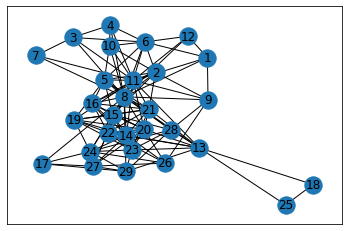

In [314]:

#ZKC_graph = nx.karate_club_graph()

nx.draw_networkx(FG)
#Let's keep track of which nodes represent John A and Mr Hi
Mr_Hi = 0
John_A = 33

#Let's display the labels of which club each member ended up joining
club_labels = nx.get_node_attributes(FG,'club')


#just show a couple of the labels
#print({key:club_labels[key] for key in range(10,16)})

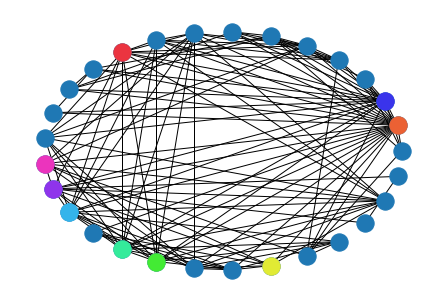

In [315]:
#To plot using networkx we first need to get the positions we want for each node. 
#Here we will use a ciruclar layout but there are many other variations you could choose!
circ_pos = nx.circular_layout(FG) 


#Use the networkx draw function to easily visualise the graph
nx.draw(FG,circ_pos)

col=["#eb6134","#3a34eb","#eb3440","#eb34bd","#8f34eb","#34b4eb","#34eb9b","#43eb34","#e1eb34"]
#let's highlight Mr Hi (green) and John A (red)
for i in range(0,len(nx.center(FG))):
    nx.draw_networkx_nodes(FG, circ_pos, nodelist=[nx.center(FG)[i]], node_color=col[i], alpha=1)
#nx.draw_networkx_nodes(FG, circ_pos, nodelist=[John_A], node_color='r', alpha=1)


In [316]:
density = nx.density(FG)

print('The edge density is: ' + str(density))

The edge density is: 0.3103448275862069


In [317]:
# find the number of edges.
dc=nx.degree_centrality(FG)
print(dc)

len(dc)

{1: 0.17857142857142855, 8: 0.8214285714285714, 11: 0.6428571428571428, 12: 0.14285714285714285, 2: 0.3214285714285714, 5: 0.3571428571428571, 6: 0.3214285714285714, 10: 0.21428571428571427, 15: 0.42857142857142855, 16: 0.3571428571428571, 21: 0.42857142857142855, 3: 0.17857142857142855, 4: 0.17857142857142855, 7: 0.10714285714285714, 19: 0.3214285714285714, 28: 0.2857142857142857, 13: 0.39285714285714285, 14: 0.46428571428571425, 17: 0.14285714285714285, 20: 0.42857142857142855, 22: 0.42857142857142855, 24: 0.3571428571428571, 27: 0.2857142857142857, 29: 0.25, 9: 0.21428571428571427, 26: 0.21428571428571427, 18: 0.07142857142857142, 23: 0.39285714285714285, 25: 0.07142857142857142}


29

In [318]:
CC=nx.closeness_centrality(FG)
print(CC)

len(CC)

{1: 0.5185185185185185, 8: 0.8484848484848485, 11: 0.7368421052631579, 12: 0.5, 2: 0.5714285714285714, 5: 0.5714285714285714, 6: 0.5490196078431373, 10: 0.5185185185185185, 15: 0.6086956521739131, 16: 0.5833333333333334, 21: 0.6363636363636364, 3: 0.509090909090909, 4: 0.509090909090909, 7: 0.49122807017543857, 19: 0.5714285714285714, 28: 0.5833333333333334, 13: 0.6222222222222222, 14: 0.6511627906976745, 17: 0.5185185185185185, 20: 0.6363636363636364, 22: 0.6363636363636364, 24: 0.5833333333333334, 27: 0.56, 29: 0.5714285714285714, 9: 0.5384615384615384, 26: 0.4745762711864407, 18: 0.39436619718309857, 23: 0.5384615384615384, 25: 0.39436619718309857}


29

In [319]:
bc=nx.betweenness_centrality(FG,normalized=True, endpoints=False)
print(bc)

len(bc)

{1: 0.0020041686708353375, 8: 0.3003763570523607, 11: 0.14933846565187991, 12: 0.0, 2: 0.010747065006324262, 5: 0.015549676660787775, 6: 0.012345679012345677, 10: 0.0013227513227513227, 15: 0.016000120212694133, 16: 0.007936804351370178, 21: 0.017479510322647576, 3: 0.001763668430335097, 4: 0.0006613756613756613, 7: 0.0, 19: 0.0069365441649910965, 28: 0.018718829095424175, 13: 0.14726954979522672, 14: 0.0279304673609062, 17: 0.0, 20: 0.02351499746924583, 22: 0.02351499746924583, 24: 0.02321644445282789, 27: 0.010814557772229729, 29: 0.012004011481135661, 9: 0.015473963622111769, 26: 0.005605946082136557, 18: 0.0, 23: 0.017198916603678505, 25: 0.0}


29

EigenVector Centrality
 It decides that a node is important if it is connected to other important nodes. 
    
Google Page rank algorithm is variant of EigenVector

In [320]:
bc2=nx.eigenvector_centrality(FG)
print(bc2)

{1: 0.0889204683676113, 8: 0.3537667558773763, 11: 0.2933674371726929, 12: 0.07987472263803073, 2: 0.1797270020958043, 5: 0.2001502589151255, 6: 0.13616072240923383, 10: 0.11477344704815468, 15: 0.2538220838276355, 16: 0.23431777153310637, 21: 0.2684075308494486, 3: 0.08613497994003153, 4: 0.09013031471015596, 7: 0.06715034864585595, 19: 0.20145059622003816, 28: 0.14981748279383597, 13: 0.20489668333580674, 14: 0.2730455090985743, 17: 0.07311581536811933, 20: 0.25839846106638464, 22: 0.25839846106638464, 24: 0.17459212853681202, 27: 0.14875869189289787, 29: 0.12130013463606469, 9: 0.10782346462688279, 26: 0.11181547910599708, 18: 0.020655062592724514, 23: 0.2196395492429112, 25: 0.020655062592724514}
